# Model Evaluation

This notebook is to evaluate the model trained for VQA.

In [1]:
%matplotlib inline
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Get Dataloader

In [2]:
from data_loader import get_loader

# dataloader params
#input_dir = '../../data/vqa/inputs64'
input_dir = '../../data/vqa/inputs224'
max_qst_length = 30
max_num_ans = 10
batch_size = 4
num_workers = 0
train_portion = 0.01

data_loader = get_loader(
    input_dir=input_dir,
    input_vqa_train='train.npy',
    input_vqa_valid='valid.npy',
    max_qst_length=max_qst_length,
    max_num_ans=max_num_ans,
    batch_size=batch_size,
    num_workers=num_workers,
    train_portion=train_portion)

train_loader = data_loader['train']
train_dataset = train_loader.dataset.dataset
print(f'data_loader train len: {len(train_loader)}')
print(f'qst_vocab_size: {train_dataset.qst_vocab.vocab_size}')


data_loader train len: 1110
qst_vocab_size: 17858


### Get Model

In [3]:
import config
from models_lct import VqaModel as LctVqaModel

config.ARCH_TYPE = 'fixed-darts'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# model params
embed_size = 512
qst_vocab_size = train_dataset.qst_vocab.vocab_size
ans_vocab_size = 1000
word_embed_size = 300
num_layers = 1
hidden_size = 512

def get_model(exp_path):
    model = LctVqaModel(
        embed_size=embed_size,
        qst_vocab_size=qst_vocab_size,
        ans_vocab_size=ans_vocab_size,
        word_embed_size=word_embed_size,
        num_layers=num_layers,
        hidden_size=hidden_size
    )
    model.to( DEVICE )
    model_name = 'ef_model.pt'
    model_path = os.path.join(exp_path, model_name)
    state_dict = torch.load(model_path, map_location=DEVICE)
    model.load_state_dict( state_dict['ef_model'] )
    
    # freeze params
    for param in model.parameters():
        param.requires_grad = False
    model.eval()
    return model

exp_dir = './experiment_data'
# exp_name = 'qst_eval'
exp_name = 'darts-fixed-eval'
exp_path = os.path.join(exp_dir, exp_name)
model = get_model(exp_path)
print('model type:', type(model))

48 48 48
48 192 48
192 192 48
192 192 48
192 192 96
192 384 96
384 384 96
384 384 96
384 384 96
384 384 192
384 768 192
768 768 192
768 768 192
768 768 192
model type: <class 'models_lct.VqaModel'>


### Evaluate Model - Plots

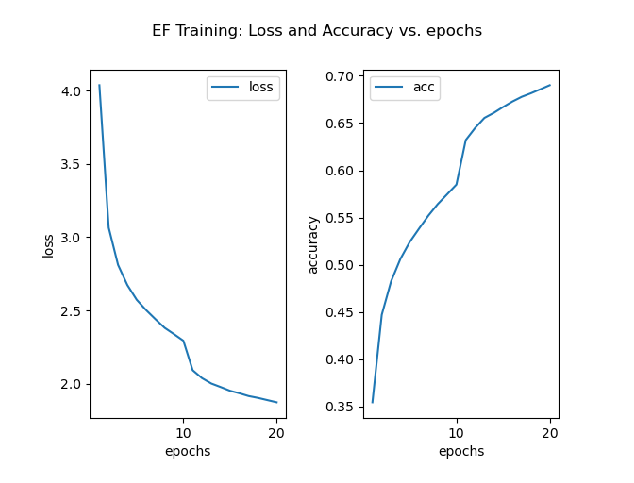

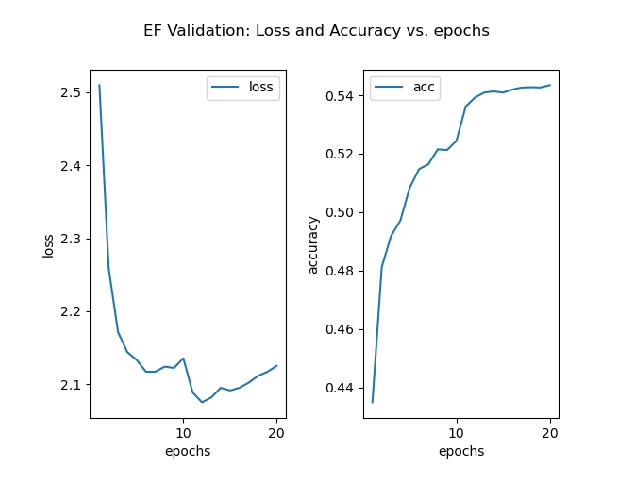

In [4]:
plt.rcParams['figure.dpi'] = 150
ef_train_plot_path = os.path.join( exp_path, 'ef_train_loss_acc.png' )
ef_val_plot_path = os.path.join( exp_path, 'ef_val_loss_acc.png' )

plt.axis('off')
train_img = mpimg.imread(ef_train_plot_path)
plt.imshow(train_img)
plt.show()

plt.axis('off')
val_img = mpimg.imread(ef_val_plot_path)
plt.imshow(val_img)
plt.show()

if 'fixed' not in config.ARCH_TYPE:
    w_train_plot_path = os.path.join( exp_path, 'w_train_loss_acc.png' )
    plt.axis('off')
    train_img = mpimg.imread(w_train_plot_path)
    plt.imshow(train_img)
    plt.show()

### Evaluate Model - Questions ( Deterministic Sampling )

qst_encoder deterministic: True temperature: 0.1
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262691.jpg


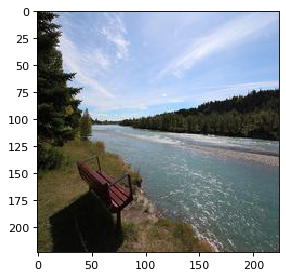

ground truth qst: how many people are at the bench ? ans: 0
generated qst: is this a river or a river in north america ? ans: ocean


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525101.jpg


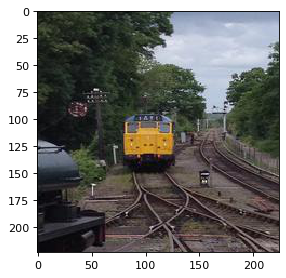

ground truth qst: how many tracks intersect ? ans: 3
generated qst: what is the train on ? ans: tracks


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263261.jpg


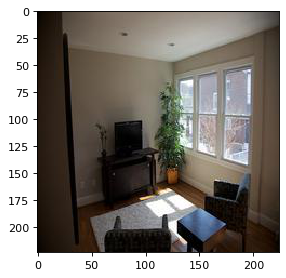

ground truth qst: are the lights on ? ans: no
generated qst: what is the floor made of ? ans: wood


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131323.jpg


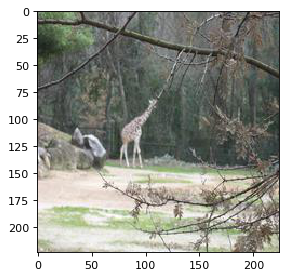

ground truth qst: are some of the trees dead ? ans: yes
generated qst: what is the giraffe ' s eyes ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263111.jpg


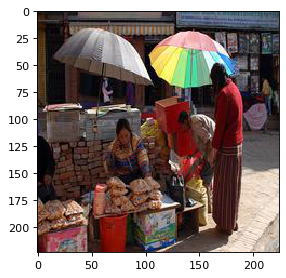

ground truth qst: is everyone a female in the picture ? ans: no
generated qst: what is the man holding in his hand ? ans: umbrella


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524651.jpg


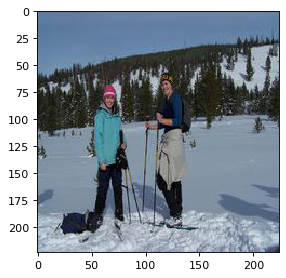

ground truth qst: are both these skiers adults ? ans: yes
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394404.jpg


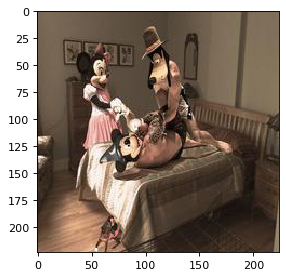

ground truth qst: are these humans ? ans: yes
generated qst: what is the dog sitting on ? ans: couch


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000225213.jpg


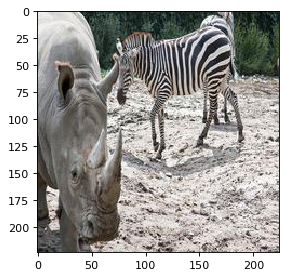

ground truth qst: which animals are these ? ans: zebra
generated qst: what is the giraffe ' s eyes ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132303.jpg


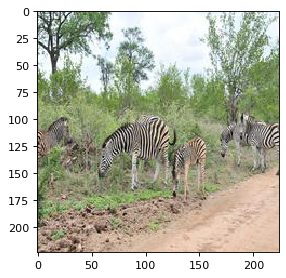

ground truth qst: are the zebras walking on a road ? ans: no
generated qst: how many animals are there ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524695.jpg


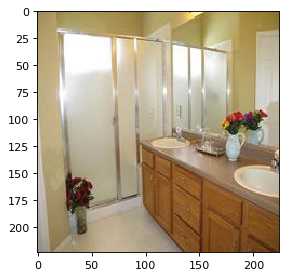

ground truth qst: what is behind the frosted glass ? ans: shower
generated qst: what is the color of the toilet ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263311.jpg


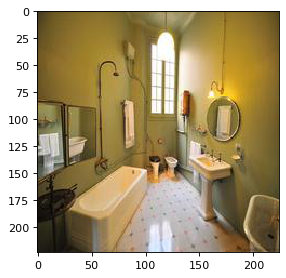

ground truth qst: what size is the window in this room ? ans: large
generated qst: what is the color of the fridge ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394208.jpg


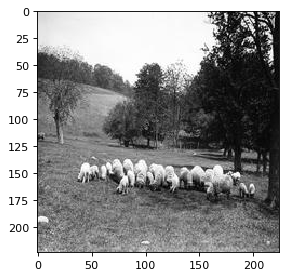

ground truth qst: are there more than 10 animals ? ans: yes
generated qst: what are the animals in the picture ? ans: sheep


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000109148.jpg


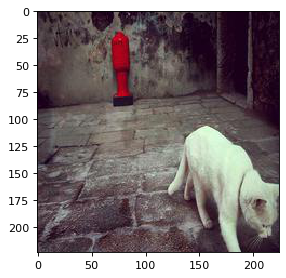

ground truth qst: what is the floor made of ? ans: stone
generated qst: what is the dog playing with ? ans: food


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000474858.jpg


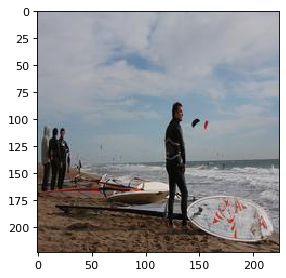

ground truth qst: what is flying in the air ? ans: kites
generated qst: what is the man doing ? ans: standing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131351.jpg


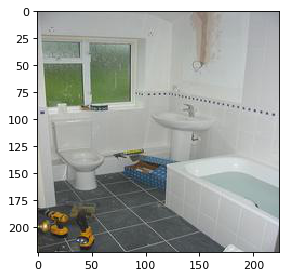

ground truth qst: what is the ratio of white tiles to blue ? ans: unknown
generated qst: what is the floor made of ? ans: tile


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262980.jpg


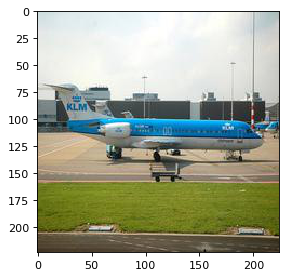

ground truth qst: is the plane flying ? ans: no
generated qst: what is the name of the airline ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262329.jpg


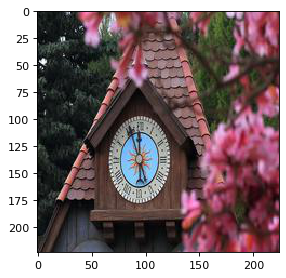

ground truth qst: what color are the flowers ? ans: pink
generated qst: what time is it ? ans: unknown


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000568135.jpg


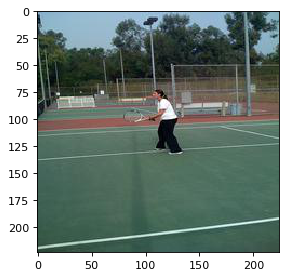

ground truth qst: is she wearing pants ? ans: yes
generated qst: what is the man holding in his hand ? ans: tennis racket


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131952.jpg


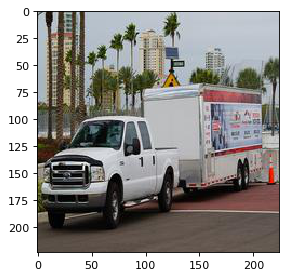

ground truth qst: how many orange cones are there ? ans: 1
generated qst: what is the name of the street sign ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524377.jpg


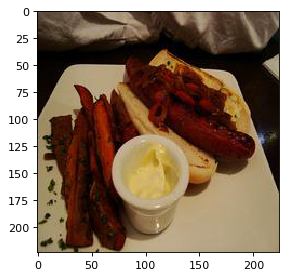

ground truth qst: what kind of sauce is in the largest ramekin ? ans: not sure
generated qst: what is the green vegetable ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131674.jpg


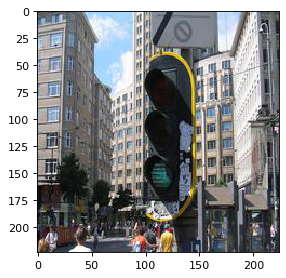

ground truth qst: what is on the top sticker ? ans: bear
generated qst: what is the name of the street sign ? ans: unknown


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000480812.jpg


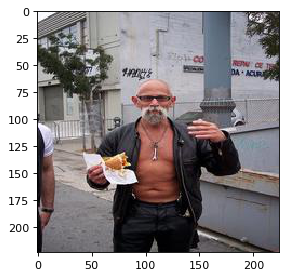

ground truth qst: what is the man holding ? ans: hot dog
generated qst: what is the man holding in his hand ? ans: hot dog


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000996.jpg


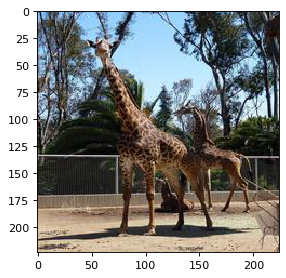

ground truth qst: are the giraffes sitting ? ans: no
generated qst: what is the giraffe doing ? ans: walking


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524314.jpg


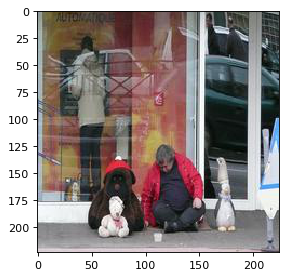

ground truth qst: why is the man on the street ? ans: sitting
generated qst: what is the dog playing with ? ans: umbrella


In [5]:
plt.rcParams['figure.dpi'] = 80
qst_vocab = train_dataset.qst_vocab
ans_vocab = train_dataset.ans_vocab
unk_idx = ans_vocab.unk2idx

qst_encoder = model.qst_encoder
qst_encoder.deterministic = True
qst_encoder.temperature = 0.1
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')

def evaluate_qst(model, data_loader, N=24):
    print( 'Evaluating question answer pairs' )
    num_eval = 0
    for batch_idx, batch_sample in enumerate(data_loader):
        if num_eval >= N:
            break
        # print(f'batch_idx: {batch_idx}')
        image = batch_sample['image'].to(DEVICE)
        question = batch_sample['question']
        answer = batch_sample['answer_label']
        image_path = batch_sample['image_path']
        
        # ground truth question and answers
        qst = [ qst_vocab.arr2qst( q ) for q in question ]
        ans = [ ans_vocab.idx2word( a ) for a in answer ]
        
        # generated question-answer
        gen_question, gen_answer = model.generate( image )
        gen_answer[:, unk_idx] = -9999.
        gen_answer = torch.argmax( gen_answer, 1 )
        gen_qst = [ qst_vocab.arr2qst( q ) for q in gen_question ]
        gen_ans = [ ans_vocab.idx2word( a ) for a in gen_answer ]
        
        n = len( image )
        for i in range( n ):
            mod_path = image_path[i].replace( '64', '' )
            print( f'\n\nimage path:{mod_path}' )
            img = mpimg.imread(mod_path)
            imgplot = plt.imshow(img)
            plt.show()
            print( f'ground truth qst: {qst[i]} ans: {ans[i]}' )
            print( f'generated qst: {gen_qst[i]} ans: {gen_ans[i]}' )
        num_eval += n
    
evaluate_qst(model, train_loader)

### Evaluate Model - Questions ( Stochastic Sampling )

qst_encoder deterministic: False temperature: 0.6
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262399.jpg


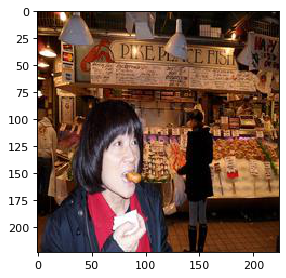

ground truth qst: what is the name of the store behind the lady ? ans: <unk>
generated qst: what is the name of the an bags ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000474858.jpg


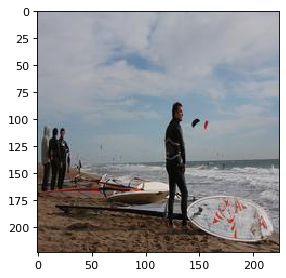

ground truth qst: what color is the man ' s skin ? ans: white
generated qst: what is on the back of the truck ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131277.jpg


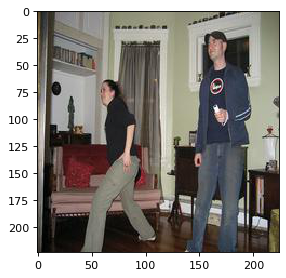

ground truth qst: is there a man and a woman ? ans: yes
generated qst: what color is the cat ? ans: black


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393230.jpg


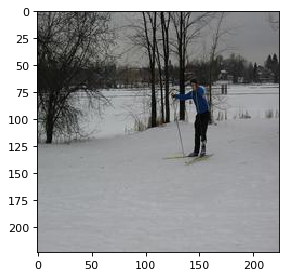

ground truth qst: is the person wearing a hat ? ans: yes
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393325.jpg


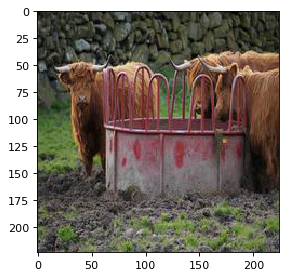

ground truth qst: do you see a flower ? ans: no
generated qst: what is the name of the player ? ans: giraffe


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394211.jpg


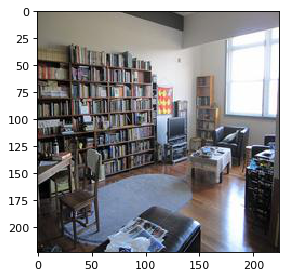

ground truth qst: is there a television in the corner ? ans: yes
generated qst: what is the child holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524679.jpg


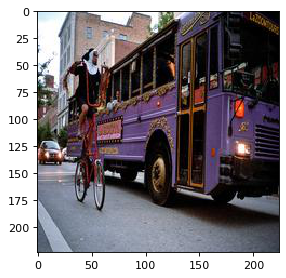

ground truth qst: what is the nun doing in this scene ? ans: <unk>
generated qst: is the man on the bike wearing a helmet ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131427.jpg


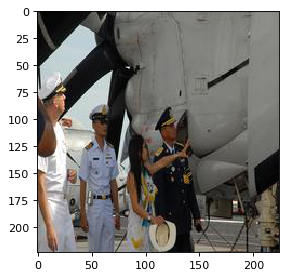

ground truth qst: how many females are in the picture ? ans: 1
generated qst: what is the color of the cat ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000419019.jpg


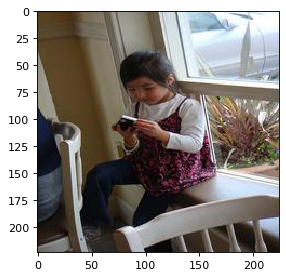

ground truth qst: what color is the chair ? ans: white
generated qst: are the people in fancy or dish ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000137045.jpg


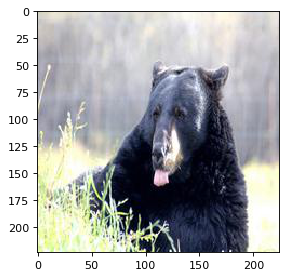

ground truth qst: what is this ? ans: bear
generated qst: how many people are seated ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525529.jpg


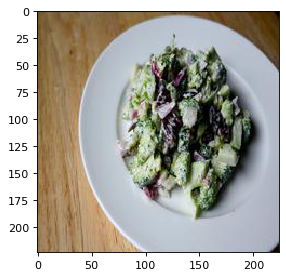

ground truth qst: what is the plate sitting on ? ans: table
generated qst: is the dog on a bed ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525518.jpg


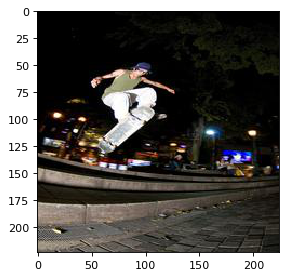

ground truth qst: what ' s the kid doing ? ans: skating
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000043893.jpg


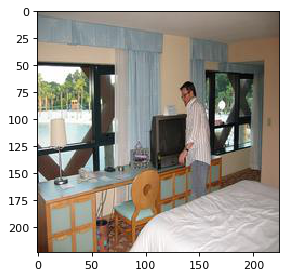

ground truth qst: what object is this man directly in front of ? ans: tv
generated qst: are the children in the water ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131909.jpg


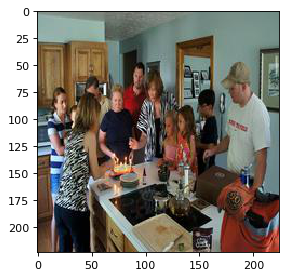

ground truth qst: what is the person behind the counter serving ? ans: cake
generated qst: what is the name of the batter in uniform ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000506322.jpg


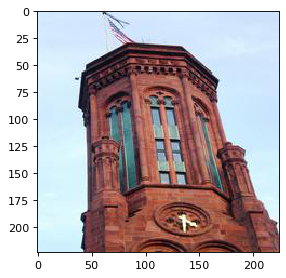

ground truth qst: is this a church ? ans: no
generated qst: what color is the sign ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000270612.jpg


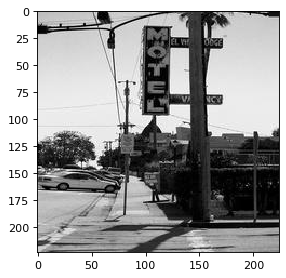

ground truth qst: are the cars parked on the street ? ans: yes
generated qst: what color is the building in the background ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262747.jpg


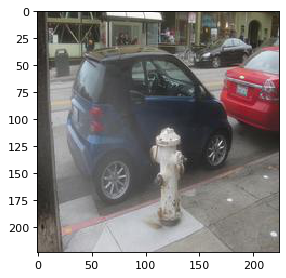

ground truth qst: the blue car is what make and model ? ans: unknown
generated qst: what is the girl on the right carrying ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000506315.jpg


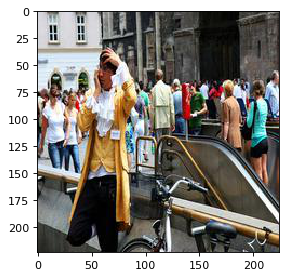

ground truth qst: is the a bike in a picture ? ans: yes
generated qst: how many people are wearing hats ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131427.jpg


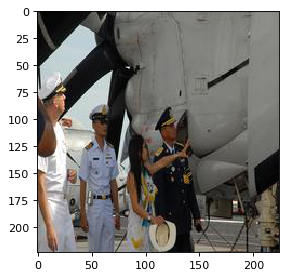

ground truth qst: are these people friends ? ans: yes
generated qst: what is the color of the umbrella ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393317.jpg


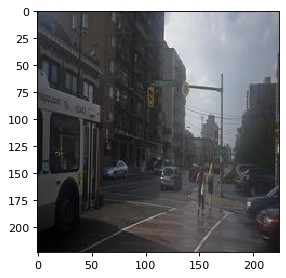

ground truth qst: what color is the traffic signal ? ans: green
generated qst: what is the person holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524338.jpg


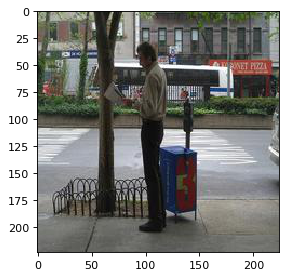

ground truth qst: what type of tree is the man standing next to ? ans: maple
generated qst: what is the man doing ? ans: walking


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262932.jpg


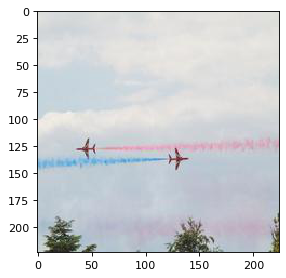

ground truth qst: what is in the air ? ans: planes
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000270636.jpg


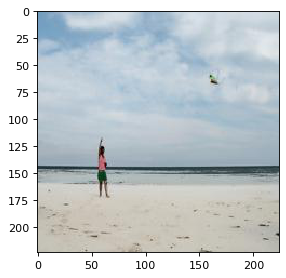

ground truth qst: who is flying the kite ? ans: woman
generated qst: what is on the ground ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131465.jpg


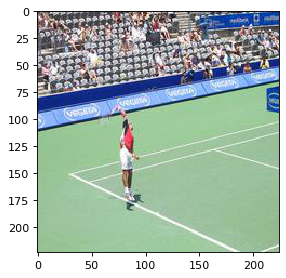

ground truth qst: what color is the court ? ans: green
generated qst: is the man wearing glasses ? ans: yes


In [12]:
qst_encoder = model.qst_encoder
qst_encoder.deterministic = False
qst_encoder.temperature = 0.6
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')
evaluate_qst(model, train_loader, N=24)